In [1]:
import os, h5py
import pandas as pd
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import pyproj
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
## Get ATL08 photon data
'''
os.chdir('/home/shashank/Downloads/icesat2/icesat2_data/ATL08/')
f = h5py.File('ATL08_20181028191317_04610101_004_01.h5', 'r')

beam_numbers = ['/gt1r', '/gt2r', '/gt3r']

atl08_photon_data = pd.DataFrame([], columns=["photon_index", "seg_id", "photon_class", "photon_height", "quality_flag"])

for beam in beam_numbers:
  classed_PC_indx = pd.DataFrame(f[beam + '/signal_photons/classed_pc_indx'][:])
  ph_segment_id = pd.DataFrame(f[beam + '/signal_photons/ph_segment_id'][:])
  photon_class = pd.DataFrame(f[beam + '/signal_photons/classed_pc_flag'][:]) ## 0: noise, 1: ground, 2:canopy, 3: TOC
  ph_h = pd.DataFrame(f[beam + '/signal_photons/ph_h'][:])
  d_flag = pd.DataFrame(f[beam + '/signal_photons/d_flag'][:]) 

  beam_data = pd.concat([classed_PC_indx, ph_segment_id, photon_class, ph_h, d_flag], axis=1)
  beam_data.columns = photon_data.columns
  beam_data = beam_data[(beam_data["photon_class"]==2) | (beam_data["photon_class"]==3)].reset_index(drop=True) ## Consider only canopy and top of canopy photons
  beam_data = beam_data[beam_data["quality_flag"]==1].reset_index(drop=True) ## 0:noise 1:signal. Consider only signal photons
  atl08_photon_data = photon_data.append(beam_data, ignore_index=True)
print(atl08_photon_data.head())
'''

## Get ATL03 photon data

os.chdir('/home/shashank/Downloads/icesat2/icesat2_data/ATL03/sample_h5_cabo_rojo')
f = h5py.File('ATL03_20181028191317_04610101_004_01.h5', 'r')
atl03_photon_data = pd.DataFrame([], columns=["lat", "lon", "id_count", "quality", "reference_ph_index",
                                             "reference_ph_lat", "reference_ph_lon", "segment_id", 
                                              "ph_index_begin"])

for beam in beam_numbers:
    ph_lats = pd.DataFrame(f[beam + '/heights/lat_ph'][:])
    ph_lons = pd.DataFrame(f[beam + '/heights/lon_ph'][:])
    id_count = pd.DataFrame(f[beam + '/heights/ph_id_count'][:])
    quality = pd.DataFrame(f[beam + '/heights/quality_ph'][:]) ## value >= 1 : possible afterpulse
    ref_ph_index = pd.DataFrame(f[beam + '/geolocation/reference_photon_index'][:])
    ref_ph_lat = pd.DataFrame(f[beam + '/geolocation/reference_photon_lat'][:])
    ref_ph_lon = pd.DataFrame(f[beam + '/geolocation/reference_photon_lon'][:])
    seg_id = pd.DataFrame(f[beam + '/geolocation/segment_id'][:])
    ph_index_beg = pd.DataFrame(f[beam + '/geolocation/ph_index_beg'][:])
    
    print(len(ph_lats), len(ph_lons), len(id_count), len(quality), len(ref_ph_index), len(ref_ph_lat), 
          len(ref_ph_lon), len(seg_id), len(ph_index_beg))

30107946 30107946 30107946 30107946 149706 149706 149706 149706 149706
26752206 26752206 26752206 26752206 149706 149706 149706 149706 149706
31940395 31940395 31940395 31940395 149706 149706 149706 149706 149706


In [22]:
os.chdir('/home/shashank/Downloads/icesat2/icesat2_data/ATL03/sample_h5_cabo_rojo')
f = h5py.File('ATL03_20181028191317_04610101_004_01.h5', 'r')
f.visit(print)

METADATA
METADATA/AcquisitionInformation
METADATA/AcquisitionInformation/lidar
METADATA/AcquisitionInformation/lidarDocument
METADATA/AcquisitionInformation/platform
METADATA/AcquisitionInformation/platformDocument
METADATA/DataQuality
METADATA/DataQuality/CompletenessOmission
METADATA/DataQuality/DomainConsistency
METADATA/DatasetIdentification
METADATA/Extent
METADATA/Lineage
METADATA/Lineage/ANC01
METADATA/Lineage/ANC03
METADATA/Lineage/ANC04
METADATA/Lineage/ANC05
METADATA/Lineage/ANC06-01
METADATA/Lineage/ANC06-02
METADATA/Lineage/ANC06-03
METADATA/Lineage/ANC07
METADATA/Lineage/ANC08
METADATA/Lineage/ANC11
METADATA/Lineage/ANC12-01
METADATA/Lineage/ANC12-02
METADATA/Lineage/ANC19
METADATA/Lineage/ANC22
METADATA/Lineage/ANC23
METADATA/Lineage/ANC25-03
METADATA/Lineage/ANC26-03
METADATA/Lineage/ANC28
METADATA/Lineage/ANC29
METADATA/Lineage/ANC36-03
METADATA/Lineage/ANC38-03
METADATA/Lineage/ANC41
METADATA/Lineage/ATL02
METADATA/Lineage/Control
METADATA/ProcessStep
METADATA/ProcessS

gt2l/heights/delta_time
gt2l/heights/dist_ph_across
gt2l/heights/dist_ph_along
gt2l/heights/h_ph
gt2l/heights/lat_ph
gt2l/heights/lon_ph
gt2l/heights/pce_mframe_cnt
gt2l/heights/ph_id_channel
gt2l/heights/ph_id_count
gt2l/heights/ph_id_pulse
gt2l/heights/quality_ph
gt2l/heights/signal_conf_ph
gt2l/signal_find_output
gt2l/signal_find_output/inlandwater
gt2l/signal_find_output/inlandwater/bckgrd_mean
gt2l/signal_find_output/inlandwater/bckgrd_sigma
gt2l/signal_find_output/inlandwater/delta_time
gt2l/signal_find_output/inlandwater/t_pc_delta
gt2l/signal_find_output/inlandwater/z_pc_delta
gt2l/signal_find_output/land
gt2l/signal_find_output/land/bckgrd_mean
gt2l/signal_find_output/land/bckgrd_sigma
gt2l/signal_find_output/land/delta_time
gt2l/signal_find_output/land/t_pc_delta
gt2l/signal_find_output/land/z_pc_delta
gt2l/signal_find_output/ocean
gt2l/signal_find_output/ocean/bckgrd_mean
gt2l/signal_find_output/ocean/bckgrd_sigma
gt2l/signal_find_output/ocean/delta_time
gt2l/signal_find_out

gt3r/signal_find_output/land/bckgrd_sigma
gt3r/signal_find_output/land/delta_time
gt3r/signal_find_output/land/t_pc_delta
gt3r/signal_find_output/land/z_pc_delta
gt3r/signal_find_output/ocean
gt3r/signal_find_output/ocean/bckgrd_mean
gt3r/signal_find_output/ocean/bckgrd_sigma
gt3r/signal_find_output/ocean/delta_time
gt3r/signal_find_output/ocean/t_pc_delta
gt3r/signal_find_output/ocean/z_pc_delta
orbit_info
orbit_info/crossing_time
orbit_info/cycle_number
orbit_info/lan
orbit_info/orbit_number
orbit_info/rgt
orbit_info/sc_orient
orbit_info/sc_orient_time
quality_assessment
quality_assessment/delta_time
quality_assessment/gt1l
quality_assessment/gt1l/qa_perc_signal_conf_ph_high
quality_assessment/gt1l/qa_perc_signal_conf_ph_low
quality_assessment/gt1l/qa_perc_signal_conf_ph_med
quality_assessment/gt1l/qa_perc_surf_type
quality_assessment/gt1l/qa_total_signal_conf_ph_high
quality_assessment/gt1l/qa_total_signal_conf_ph_low
quality_assessment/gt1l/qa_total_signal_conf_ph_med
quality_asses

In [93]:
## Create a dataframe for collecting all data
df = pd.DataFrame([], columns=["date", "lats", "lons", "seg_id_begin", "seg_id_end", "night_flag", "max_canopy_height_m",
                              "canopy_openness", "canopy_flag", "h_canopy_uncertainty", "cloud_flag_atm", 
                              "water_mask", "landcover"])

### Extract data for each hdf5 file in the folder from Oct 2018 to Feb 2021

os.chdir('/home/shashank/Downloads/icesat2/icesat2_data/ATL08/')

for filename in sorted(glob.glob("*.h5")):    
    
     #### Extract date from file name    
     date_str = filename.split("_")[1][0:8]
     date_obj  = datetime.strptime(date_str,'%Y%m%d')
     date = datetime.strftime(date_obj, '%d %B,%Y')
     
     ### Import the hdf file 
     f = h5py.File(filename, 'r')

     ### Extract data for all 3 strong beams
     beam_numbers = ['/gt1r', '/gt2r', '/gt3r']

     for beam in beam_numbers: 
         ### Extract required parameters from hdf
         ### Each of these parameters are calculated for a 100m segment
         lons = pd.DataFrame(f[beam + '/land_segments/longitude'][:])
         lats = pd.DataFrame(f[beam + '/land_segments/latitude'][:])
         segment_id_begin = pd.DataFrame(f[beam + '/land_segments/segment_id_beg'][:])
         segment_id_end = pd.DataFrame(f[beam + '/land_segments/segment_id_end'][:])
         night_flag = pd.DataFrame(f[beam + '/land_segments/night_flag'][:]) ## day=0, night=1 
         h_canopy = pd.DataFrame(f[beam + '/land_segments/canopy/h_canopy'][:]) ## 98 ptile of all canopy heights
         can_open = pd.DataFrame(f[beam + '/land_segments/canopy/canopy_openness'][:]) ### ** ###
         h_can_uncertainty = pd.DataFrame(f[beam + '/land_segments/canopy/h_canopy_uncertainty'][:])
         cloud_flag_atm = pd.DataFrame(f[beam + '/land_segments/cloud_flag_atm'][:]) ## Flag > 0: Clouds/aerosols could be present
         seg_watermask = pd.DataFrame(f[beam + '/land_segments/segment_watermask'][:]) ## 0:no water 1:water
         seg_landcover = pd.DataFrame(f[beam + '/land_segments/segment_landcover'][:]) ## MODIS landcover 17 classes http://www.worldhairsalon.com/sage/data-and-models/friedl_rse2010.pdf   
   
         ## Create a variable which counts the number of times '1' appears in the canopy flag
         ## -1: no data within geosegment available for analysis; 0: indicates no canopy photons within geosegment; 1: indicates canopy photons within geosegment
         ## For example, a 100 m ATL08 segment might have the following subset_can_flags: {-1 -1 -1 1 1} which would translate that no photons (canopy orground) were available for processing in the first three geosegments.
         canopy_flag = pd.DataFrame(f[beam + '/land_segments/canopy/subset_can_flag'][:])
         counter = pd.DataFrame([], index=np.arange(0, len(canopy_flag)), columns=["counter"])
         for i in range(0, len(counter)):
            count=0
            segment = canopy_flag.iloc[i,:]
            for j in range(0, 5):
                if segment[j] == 1:
                  count+=1
            counter["counter"][i] = count         
            
         ### Create a column of dates 
         dates_arr = []
         for i in range(0, len(h_canopy)):
            dates_arr.append(date)
            dates_df = pd.DataFrame(dates_arr, columns=["date"])
         
         ### Combine all the extracted parameters into a dataframe
         canopy_height_data = pd.concat([dates_df, lats, lons, segment_id_begin, segment_id_end, night_flag, 
                                        h_canopy, can_open, counter, h_can_uncertainty, cloud_flag_atm, 
                                        seg_watermask, seg_landcover], axis=1, ignore_index=True)
         canopy_height_data.columns = df.columns
            
         ### Drop pixels with no-data value and canopy openness value equal to 3.4028235e+38
         ## Consider only pixels with h_canopy_uncertainty < 10
         canopy_height_data = canopy_height_data[canopy_height_data["max_canopy_height_m"] < 1e+38] 
         canopy_height_data = canopy_height_data[canopy_height_data["canopy_openness"] < 1e+38]
         canopy_height_data = canopy_height_data[canopy_height_data["h_canopy_uncertainty"] < 10]
        
         ### Consider only pixels within the Cabo Rojo region
         canopy_height_data = canopy_height_data[(canopy_height_data["lats"]>18) & 
                                                 (canopy_height_data["lats"]<18.2)]
         canopy_height_data = canopy_height_data[(canopy_height_data["lons"] > -67.20) &
                                                 (canopy_height_data["lons"] < -66.78)]
            
         ### Extract places with no cloud/aerosol cover and no water
         canopy_height_data = canopy_height_data[canopy_height_data["cloud_flag_atm"] == 0]
         canopy_height_data = canopy_height_data[canopy_height_data["water_mask"] == 0]   
    
         ### Extract only day/night time data
         canopy_height_data = canopy_height_data[canopy_height_data["night_flag"]==1]
        
         ## Remove unwanted landcover classes permanent wetlands(11), urban(13), barren(16), water(17)
         #canopy_height_data = canopy_height_data[(canopy_height_data["landcover"]!=13) &
         #                                        (canopy_height_data["landcover"]<=14) &
         #                                        (canopy_height_data["landcover"]!=11)]
        
         ### Extract data with data quality counter
         ## Most points have counter value 5. So, choosing only those. 
         canopy_height_data = canopy_height_data[canopy_height_data["canopy_flag"]==5]
            
         ### Append canopy height data at the bottom of df
         df = df.append(canopy_height_data, ignore_index=True)

In [94]:
print(df.head())
print(df.shape)

               date       lats       lons seg_id_begin seg_id_end night_flag  \
0  01 November,2018  18.190472 -66.780006       900953     900957          1   
1  01 November,2018  18.121042 -66.787231       901338     901342          1   
2  01 November,2018  18.113829 -66.787979       901378     901382          1   
3  01 November,2018  18.111124 -66.788261       901393     901397          1   
4  01 November,2018  18.107515 -66.788628       901413     901417          1   

   max_canopy_height_m  canopy_openness canopy_flag  h_canopy_uncertainty  \
0            10.173981         2.099076           5              4.546846   
1            11.596375         2.836726           5              8.691941   
2            14.589569         3.779113           5              8.795362   
3            17.116760         4.580658           5              8.992983   
4            15.648834         4.681450           5              7.248832   

  cloud_flag_atm water_mask landcover  
0              0

In [95]:
### Convert the lat lons to UTM projection

proj_wgs84 = pyproj.Proj(init='epsg:4326')
proj_utm = pyproj.Proj(init='epsg:32620')

utmx = pd.DataFrame([], index=np.arange(0, len(df)), columns=["Northing"])
utmy = pd.DataFrame([], index=np.arange(0, len(df)), columns=["Easting"])

for i in range(0, len(df)):
   x, y = pyproj.transform(proj_wgs84, proj_utm, df["lons"][i], df["lats"][i])
   utmx["Northing"][i] = x
   utmy["Easting"][i] = y

df = pd.concat([df, utmx, utmy], axis=1, ignore_index=True)
df.columns = ["date", "lats", "lons", "night_flag", "max_canopy_height_m","data_quality_flag",
                              "canopy_openness", "canopy_flag", "h_canopy_uncertainty", "cloud_flag_atm", 
                              "water_mask", "landcover", "Northing", "Easting"]
df.to_csv("icesat2_max_canopy_height_all_hdfs_night.csv", sep=",", header=True, index=False, 
          columns=["Northing", "Easting","max_canopy_height_m","landcover"])

/home/shashank/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/shashank/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/shashank/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When mak

ValueError: Length mismatch: Expected axis has 15 elements, new values have 14 elements

In [ ]:
### GRASS GIS ###
### Imported the GliHt tiff file in UTM projection : Location glight and Mapset PERMANENT on linux laptop
### Created a raster map for ICESat2 max canopy heights in the same projection.
### Extracted the ICESat2 height for all locations where Gliht data is available

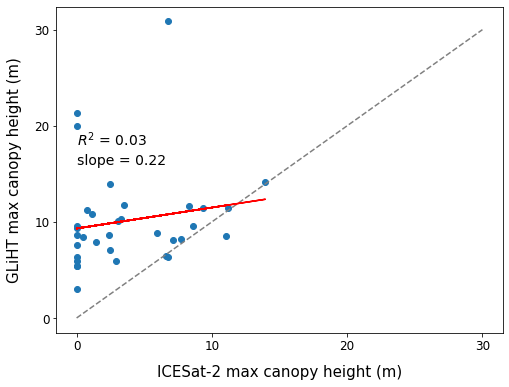

In [62]:
data = pd.read_csv("rstats_gliht_icesat_max_canopy_night", header=None, sep=" ", names=["gliht", "icesat2"])

## Remove outliers from data
#data = data[(data["icesat2"] < 20) & (data["gliht"] < 20)]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(data["icesat2"],data["gliht"],"o")
ax.set_xlabel("ICESat-2 max canopy height (m)", fontsize=15, labelpad=12)
ax.set_ylabel("GLiHT max canopy height (m)", fontsize=15, labelpad=12)
ax.set_xticks(np.arange(0,40,10))
ax.set_yticks(np.arange(0,40,10))
ax.set_xticklabels(np.arange(0,40,10), fontsize=12)
ax.set_yticklabels(np.arange(0,40,10), fontsize=12)
ax.plot(np.arange(0,40,10), np.arange(0,40,10), '--', c='grey')

# Linear regression
reg = LinearRegression().fit(np.array(data["icesat2"]).reshape(-1, 1), np.array(data["gliht"]).reshape(-1, 1))
m = reg.coef_[0][0]
c = reg.intercept_
ax.plot(data["icesat2"], m*data["icesat2"] + c, c='red')
r2 = str(round(reg.score(np.array(data["icesat2"]).reshape(-1, 1), np.array(data["gliht"]).reshape(-1, 1)), 2))
ax.text(0,18,"$R^2$ = %s" %r2, fontsize=14)

plt.show()

In [ ]:
### Extract som more info from ATL08 products such as segment id, canopy openness, cloud mask etc.

os.chdir('/home/shashank/Downloads/icesat2/icesat2_data/ATL08')
f = h5py.File('ATL08_20181028191317_04610101_004_01.h5', 'r')
print(f.visit(print))